In [1]:
import pickle
import os
import osmnx as ox
import networkx as nx
import pandas as pd
import osmnx as ox
import networkx as nx
import geohash as geohash
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw
import staticmaps

In [2]:
ox.settings.log_console=True
ox.settings.use_cache=True

In [3]:
# graph = ox.graph_from_place('Beijing,China', network_type = 'all')
# ox.plot_graph(graph,node_size=0, edge_linewidth=0.5)

In [4]:
# allfiles=os.listdir('filtered_4749_traj/fil_traj_less_than_700_car')
allfiles=os.listdir('beijing/fil_traj_less_than_700_car')
len(allfiles)

844

In [5]:
user_name=[]
latitude=[]
longitude=[]
date_time=[]
altitude_feet=[]
vehicle_type=[]
file_name=[]
# for i in range(1):
for i in range(len(allfiles)):
    with open('beijing/fil_traj_less_than_700_car/'+allfiles[i], 'rb') as f:
        data = pickle.load(f)
        files_name=allfiles[i].split('_')
        name=allfiles[i].replace('.pkl','')
#         print(name)
        user_name.append(files_name[0])
        vehicle_type.append(files_name[1])
        file_name.append(name)
        latitude.append(list(data['latitude']))
        longitude.append(list(data['longitude']))
        date_time.append(list(data['date_time']))
        altitude_feet.append(list(data['altitude_feet']))



    

In [6]:
df = pd.DataFrame(list(zip(user_name, latitude,longitude,date_time,altitude_feet,vehicle_type,file_name)),
               columns =['user_name', 'latitude','longitude','date_time','altitude_feet','vehicle_type','file_name'])

In [7]:
# df.to_csv('filtered_4749_traj/fil_traj_less_than_700_car.csv', encoding='utf-8', index=False)

In [15]:
df

,user_name,latitude,longitude,date_time,altitude_feet,vehicle_type,file_name
0,010,"[39.897961, 39.897968, 39.897974, 39.897965, 3...","[116.366856, 116.366871, 116.366901, 116.36697...","[2008-09-16 12:29:15, 2008-09-16 12:29:16, 200...","[128, 131, 131, 128, 128, 128, 128, 128, 125, ...",taxi,010_taxi_16
1,010,"[39.863458, 39.863403, 39.86335, 39.863308, 39...","[116.369065, 116.369029, 116.369033, 116.36902...","[2008-09-17 23:59:28, 2008-09-17 23:59:29, 200...","[131, 151, 148, 144, 161, 171, 177, 174, 171, ...",taxi,010_taxi_21
2,010,"[39.897999, 39.897993, 39.897988, 39.897983, 3...","[116.36742, 116.367436, 116.367463, 116.367493...","[2008-09-22 11:47:30, 2008-09-22 11:47:31, 200...","[171, 171, 171, 171, 171, 174, 174, 174, 174, ...",taxi,010_taxi_24
3,010,"[39.897906, 39.897909, 39.897913, 39.897918, 3...","[116.366915, 116.366935, 116.366956, 116.36701...","[2008-09-23 12:44:53, 2008-09-23 12:44:54, 200...","[167, 167, 167, 167, 167, 167, 167, 167, 167, ...",taxi,010_taxi_26
4,010,"[39.987166, 39.987083, 39.987011, 39.986951, 3...","[116.326858, 116.326868, 116.326868, 116.32687...","[2008-09-24 11:34:59, 2008-09-24 11:35:00, 200...","[171, 174, 177, 177, 180, 184, 184, 187, 187, ...",taxi,010_taxi_29
...,...,...,...,...,...,...,...
839,167,"[39.968638, 39.968166, 39.967857, 39.967619, 3...","[116.415225, 116.41538, 116.415369, 116.415365...","[2008-04-22 14:28:27, 2008-04-22 14:28:28, 200...","[-404, 77, 351, 531, 698, 806, 889, 946, 992, ...",taxi,167_taxi_6
840,167,"[39.975165, 39.975196, 39.975184, 39.975191, 3...","[116.329756, 116.329687, 116.329712, 116.32970...","[2008-05-05 04:14:08, 2008-05-05 04:14:10, 200...","[173, 139, 135, 134, 136, 131, 120, 112, 111, ...",taxi,167_taxi_8
841,167,"[39.952634, 39.95275, 39.952869, 39.952988, 39...","[116.31792, 116.317902, 116.317889, 116.317868...","[2008-05-05 05:33:20, 2008-05-05 05:33:21, 200...","[195, 197, 200, 203, 207, 210, 213, 217, 220, ...",taxi,167_taxi_9
842,175,"[39.9751166666667, 39.9751, 39.9753, 39.97505,...","[116.3306, 116.329833333333, 116.32825, 116.31...","[2007-10-19 05:23:15, 2007-10-19 05:24:15, 200...","[482.283464566929, 482.283464566929, 157.48031...",taxi,175_taxi_1


In [16]:
max_latitude=0
min_latitude=1000000
max_longitude=0
min_longitude=1000000
for i in range(len(latitude)):
    for j in range(len(latitude[i])):
        if(latitude[i][j]<min_latitude):
            min_latitude=latitude[i][j]
        if(latitude[i][j]>max_latitude):
            max_latitude=latitude[i][j]
        if(longitude[i][j]<min_longitude):
            min_longitude=longitude[i][j]
        if(longitude[i][j]>max_longitude):
            max_longitude=longitude[i][j]


In [17]:
# print(max_latitude)
# print(min_latitude)
# print("**************************")
# print(max_longitude)
# print(min_longitude)

40.6582166666667
31.1863666666667
**************************
121.44995
114.390033333333


In [7]:
# max_latitude1=41.853
# min_latitude1=38.199
# max_longitude1=121.097
# min_longitude1=113.643

# max_latitude1=43.660
# min_latitude1=36.359
# max_longitude1=123.125
# min_longitude1=108.217
max_latitude1=40.6585
min_latitude1=38.950
max_longitude1=117.125
min_longitude1=115.217

In [8]:
counter=0
for i in range(df.shape[0]):
#     for j in range(len(df['longitude'][i])):
#         print(df['longitude'][i][j])
    if((max(df['latitude'][i])<=max_latitude1) and (min(df['latitude'][i])>= min_latitude1) and (max(df['longitude'][i])<= max_longitude1) and (min(df['longitude'][i])>= min_longitude1)):
        counter=counter+1
print(counter)

840


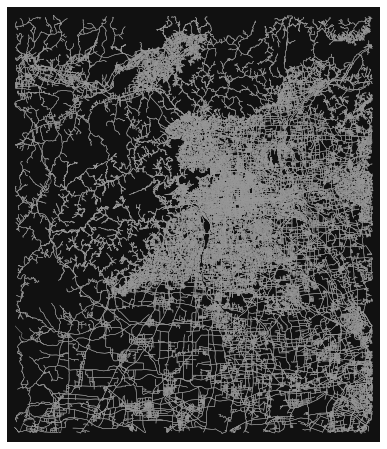

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)

In [9]:
porto_graph=ox.graph_from_bbox(max_latitude1,min_latitude1,max_longitude1,min_longitude1,network_type = 'drive')
ox.plot_graph(porto_graph,node_size=0, edge_linewidth=0.5)

In [7]:
# for i in range(1):
#     i=4
#     if((max(df['latitude'][i])<=max_latitude1) and (min(df['latitude'][i])>= min_latitude1) and (max(df['longitude'][i])<= max_longitude1) and (min(df['longitude'][i])>= min_longitude1)):
#         for j in range(len(df['latitude'][i])):
#             org = ox.nearest_nodes(porto_graph,df['longitude'][i][j],df['latitude'][i][j])
#             print(org)

In [15]:
def image_generation(range_start,range_stop,limit,sublimit,xs,ys): 
    context = staticmaps.Context()
    context.set_zoom(14)
    context.set_tile_provider(staticmaps.tile_provider_ArcGISWorldImagery)
    all_routes=[]
    for i in range(range_start,range_stop,1):
        org = ox.nearest_nodes(porto_graph,xs[i],ys[i])
        all_routes.append(org)
    line=[]
    
    unique_set = set(all_routes)
    print(all_routes)
    if(len(unique_set))>1:
        for i in range(len(all_routes)):
            temp=staticmaps.create_latlng(porto_graph.nodes[all_routes[i]]['y'], porto_graph.nodes[all_routes[i]]['x'])
            line.append(temp)
        context.add_object(staticmaps.Line(line,width=4))
        start = staticmaps.create_latlng(porto_graph.nodes[all_routes[0]]['y'], porto_graph.nodes[all_routes[0]]['x'])
        start_marker = staticmaps.ImageMarker(start, "start16.png", origin_x=10, origin_y=15)
        context.add_object(start_marker)
        end = staticmaps.create_latlng(porto_graph.nodes[all_routes[-1]]['y'], porto_graph.nodes[all_routes[-1]]['x'])
        end_marker = staticmaps.ImageMarker(end, "endblue16.png", origin_x=10, origin_y=15)
        context.add_object(end_marker)
        image = context.render_cairo(512, 512)
        
#         image.write_to_png("staticmap/geolife/"+str(limit)+"_"+str(sublimit)+"_staticMap_original.png")
        image.write_to_png("beijing/csv/"+str(limit)+"_"+str(sublimit)+"_staticMap_original.png")
        
        return True
    else:
        return False 

In [16]:
count=0
limit=0
increment_value=120
for i in range(1):
    print(i)
# for i in range(10):
    if((max(df['latitude'][i])<=max_latitude1) and (min(df['latitude'][i])>= min_latitude1) and (max(df['longitude'][i])<= max_longitude1) and (min(df['longitude'][i])>= min_longitude1)):
        limit=limit+1
        if(limit>5000):
            print("Raw no: "+str(count))
            break
        image_parameter=0
        next_image_parameter=0
        sublimit=1
        while(next_image_parameter<len(df['latitude'][i])):
            next_image_parameter=image_parameter+increment_value
            if(next_image_parameter>len(df['latitude'][i])):
                next_image_parameter=len(df['latitude'][i]) 
            if(((next_image_parameter+increment_value)-next_image_parameter)<80):
                next_image_parameter=len(df['latitude'][i])
            if((next_image_parameter-image_parameter)>4):
                flag=image_generation(image_parameter,next_image_parameter,df['file_name'][i],sublimit,df['longitude'][i],df['latitude'][i])
            image_parameter=next_image_parameter-1
            if(flag):
                sublimit=sublimit+1
                    
                    


    
    

0
[734169365, 734169365, 734169365, 734169365, 734169365, 734169365, 734169365, 734169365, 734169365, 9378025381, 9378025381, 9378025381, 9378025381, 9378025381, 9378025381, 9378025381, 9378025381, 9378025381, 734169781, 734169781, 734169781, 734169953, 734169953, 734169953, 734169953, 734169953, 734169953, 734169953, 459582626, 459582626, 459582626, 459582626, 459582626, 459582626, 459582626, 459582626, 459582626, 459582626, 459582626, 459582626, 2048161758, 2048161758, 2048161758, 2048161758, 2048161758, 2048161758, 2048161758, 2048161758, 2048161758, 2048161758, 2048161758, 2048161758, 2048161758, 2048161758, 2048161758, 2048161758, 2048161758, 2048161758, 2048161758, 2048161758, 2048161758, 2048161758, 2048161758, 2048161758, 2048161758, 2048161758, 2048161758, 2048161758, 2048161758, 2048161758, 2048161758, 2048161758, 2048161758, 2048161758, 2048161758, 2048161758, 2048161758, 2048161758, 2048161758, 2048161758, 2048161758, 2048161758, 2048161758, 2048161758, 2048161758, 20481617

In [51]:
# df['latitude']
df.shape[0]

1025

In [6]:
# def calculate_median(test_list):
#     test_list.sort()
#     mid = len(test_list) // 2
#     res = (test_list[mid] + test_list[~mid]) / 2
#     return res

In [5]:
# calculate_median(length_trajectory)

In [2]:
# with open('GeoparseDataset/'+allfiles[5], 'rb') as f:
#     # The protocol version used is detected automatically, so we do not
#     # have to specify it.
#     data = pickle.load(f)
# print(data)
# print(allfiles[1])

In [3]:
# data['latitude'][0]

In [4]:
# len(data)

In [1]:
# for i in range(len(data)):
#     print(data['latitude'][i])
#     print(data['longitude'][i])
#     org = ox.nearest_nodes(graph,data['longitude'][i],data['latitude'][i])
#     print(org)
#     print(graph.nodes[org])